# Khai Báo Thư Viện

In [1]:
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import *
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tiền Xử Lý Dữ Liệu

### Dataframe 1

In [264]:
# DLBCl.csv
df_1 = pd.read_csv("https://raw.githubusercontent.com/TranAnh35/Data_mining/main/CSV/DLBCL.csv")
df_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5461,V5462,V5463,V5464,V5465,V5466,V5467,V5468,V5469,V5470
0,0,59,17480,3,384,541,2310,21,-160,-30,...,354,71,286,575,165,132,1036,1523,366,3
1,0,267,12086,52,-325,97,6170,1780,254,1475,...,363,221,176,409,2076,147,4254,6056,81,-4
2,0,88,8611,-7,491,493,6772,1452,1272,665,...,263,266,299,630,1468,169,1934,2901,450,38
3,0,-37,24197,25,-694,47,3017,11801,10003,1255,...,93,126,63,166,910,13,2469,2465,321,-63
4,0,109,15109,38,-108,216,3201,3296,2997,2687,...,146,370,188,822,350,69,608,1667,213,15


In [4]:
df_1.shape

(77, 5470)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 5470 entries, V1 to V5470
dtypes: int64(5470)
memory usage: 3.2 MB


In [6]:
df_1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5461,V5462,V5463,V5464,V5465,V5466,V5467,V5468,V5469,V5470
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.246753,162.298701,22308.363636,10.545455,-598.246753,790.610390,3236.376623,1142.558442,370.766234,498.12987,...,349.857143,183.675325,243.259740,516.844156,611.194805,193.792208,1288.155844,1924.688312,249.142857,-132.792208
std,0.433949,111.390265,13196.888061,66.586024,2417.659733,906.825988,2104.789638,2724.416082,1330.330360,802.20957,...,238.273158,159.916956,131.339095,284.310665,654.451056,132.363270,899.104029,2149.767969,305.609775,263.358038
min,0.000000,-37.000000,2853.000000,-106.000000,-7783.000000,-131.000000,400.000000,-231.000000,-697.000000,-798.00000,...,83.000000,-90.000000,52.000000,103.000000,-18.000000,-57.000000,258.000000,-738.000000,-661.000000,-1375.000000
25%,0.000000,84.000000,16183.000000,-26.000000,-1227.000000,219.000000,1492.000000,-15.000000,-134.000000,-44.00000,...,183.000000,102.000000,152.000000,301.000000,165.000000,101.000000,713.000000,572.000000,87.000000,-243.000000
50%,0.000000,139.000000,19895.000000,2.000000,28.000000,488.000000,2638.000000,159.000000,37.000000,251.00000,...,319.000000,160.000000,209.000000,457.000000,368.000000,170.000000,1038.000000,1165.000000,263.000000,-22.000000
75%,0.000000,204.000000,25501.000000,30.000000,489.000000,1004.000000,4188.000000,999.000000,312.000000,939.00000,...,412.000000,246.000000,286.000000,630.000000,756.000000,255.000000,1499.000000,2465.000000,409.000000,11.000000
max,1.000000,628.000000,84063.000000,425.000000,4869.000000,4099.000000,9075.000000,16785.000000,10003.000000,3575.00000,...,1266.000000,1133.000000,695.000000,1700.000000,2655.000000,635.000000,5936.000000,11906.000000,1193.000000,152.000000


In [7]:
df_1.isnull().sum().value_counts()

0    5470
Name: count, dtype: int64

Data không có giá trị null

In [8]:
df_1.duplicated().value_counts()

False    77
Name: count, dtype: int64

Dữ liệu không có giá trị trùng lặp

In [9]:
df_1["V1"].value_counts()

V1
0    58
1    19
Name: count, dtype: int64

In [10]:
df_1.dtypes.value_counts()

int64    5470
Name: count, dtype: int64

In [275]:
print(df_1.corr())

             V1        V2        V3        V4        V5        V6        V7  \
V1     1.000000 -0.098723  0.176661  0.219323 -0.201347 -0.088928 -0.332922   
V2    -0.098723  1.000000  0.396876  0.163616  0.070130  0.259539  0.208504   
V3     0.176661  0.396876  1.000000  0.549639 -0.246358 -0.095872 -0.353157   
V4     0.219323  0.163616  0.549639  1.000000 -0.324865 -0.117196 -0.227364   
V5    -0.201347  0.070130 -0.246358 -0.324865  1.000000  0.592900  0.491517   
...         ...       ...       ...       ...       ...       ...       ...   
V5466  0.364449  0.335877  0.385333  0.351980 -0.207857  0.224783  0.040961   
V5467 -0.148182 -0.031843 -0.100667  0.007023  0.035533  0.020825  0.398224   
V5468 -0.335222 -0.063436 -0.527874 -0.187677 -0.047628 -0.082031  0.426516   
V5469  0.057673 -0.023001 -0.125754 -0.124008  0.489504  0.165264  0.137757   
V5470 -0.086805 -0.272803 -0.615124 -0.478780  0.655180  0.139879  0.241603   

             V8        V9       V10  ...     V5461 

### Dataframe 2

In [3]:
# Colon.csv
df_2 = pd.read_csv("https://raw.githubusercontent.com/TranAnh35/Data_mining/main/CSV/colon1.csv")
df_2.head()

,class,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,...,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,...,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125
1,0,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,...,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375
2,1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,...,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625
3,0,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,...,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500
4,1,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,...,126.46429,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250


In [79]:
df_2.shape

(62, 2001)

In [80]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, class to T49647
dtypes: float64(2000), int64(1)
memory usage: 969.4 KB


In [82]:
df_2.isnull().sum().value_counts()

0    2001
Name: count, dtype: int64

In [84]:
df_2["class"].value_counts()

class
1    40
0    22
Name: count, dtype: int64

In [4]:
df_2.describe()

,class,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,...,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.645161,7015.786703,4966.959971,4094.727906,3987.789302,2937.126132,4705.119294,3588.800302,2872.288627,4680.191126,...,186.204532,100.227903,293.222722,124.653387,133.186935,184.136636,84.118387,114.930000,53.251230,42.965827
std,0.482370,3092.970593,2188.890465,1818.080945,2019.086906,1356.932895,2400.848121,1872.106074,1122.365445,2417.239210,...,117.605889,78.022713,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175
min,0.000000,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,...,5.950000,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250
25%,0.000000,4877.364750,3408.951225,2763.725975,2648.942800,1890.857050,2843.368825,2112.952225,2050.814050,2971.792800,...,117.778870,48.409375,161.518125,69.121250,71.637500,85.905057,30.701875,53.881563,27.334375,24.610000
50%,1.000000,6274.612550,4738.280500,3890.338150,3451.498150,2666.075700,4416.617650,3438.180000,2844.960650,4088.735500,...,152.722625,83.080625,251.883125,114.658125,104.271875,142.578565,56.385625,93.825625,45.358125,34.775000
75%,1.000000,8712.283250,6455.843300,5008.993925,4738.408950,3563.969400,6076.031850,4420.645200,3414.228475,6171.382750,...,247.298513,117.208438,424.742500,177.730310,149.772188,212.019948,101.231250,145.074062,66.235312,54.697500
max,1.000000,14876.407000,10152.273000,8605.044000,11248.680000,8093.875000,11222.682000,9939.246000,5917.026400,14144.835000,...,725.338100,438.383760,902.572500,333.418760,464.930000,702.130900,405.600000,390.890000,197.220000,126.826250


### Dataframe 3

In [4]:
# Prostate.csv
df_3 = pd.read_csv("https://raw.githubusercontent.com/TranAnh35/Data_mining/main/CSV/DLBCL.csv")
df_3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5461,V5462,V5463,V5464,V5465,V5466,V5467,V5468,V5469,V5470
0,0,59,17480,3,384,541,2310,21,-160,-30,...,354,71,286,575,165,132,1036,1523,366,3
1,0,267,12086,52,-325,97,6170,1780,254,1475,...,363,221,176,409,2076,147,4254,6056,81,-4
2,0,88,8611,-7,491,493,6772,1452,1272,665,...,263,266,299,630,1468,169,1934,2901,450,38
3,0,-37,24197,25,-694,47,3017,11801,10003,1255,...,93,126,63,166,910,13,2469,2465,321,-63
4,0,109,15109,38,-108,216,3201,3296,2997,2687,...,146,370,188,822,350,69,608,1667,213,15


In [7]:
df_3.shape

(102, 6034)

In [12]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Columns: 6034 entries, V1 to V6034
dtypes: float64(6033), int64(1)
memory usage: 4.7 MB


In [6]:
df_3["V1"].value_counts()

V1
1    52
0    50
Name: count, dtype: int64

In [7]:
df_3.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V5461,V5462,V5463,V5464,V5465,V5466,V5467,V5468,V5469,V5470
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.246753,162.298701,22308.363636,10.545455,-598.246753,790.610390,3236.376623,1142.558442,370.766234,498.12987,...,349.857143,183.675325,243.259740,516.844156,611.194805,193.792208,1288.155844,1924.688312,249.142857,-132.792208
std,0.433949,111.390265,13196.888061,66.586024,2417.659733,906.825988,2104.789638,2724.416082,1330.330360,802.20957,...,238.273158,159.916956,131.339095,284.310665,654.451056,132.363270,899.104029,2149.767969,305.609775,263.358038
min,0.000000,-37.000000,2853.000000,-106.000000,-7783.000000,-131.000000,400.000000,-231.000000,-697.000000,-798.00000,...,83.000000,-90.000000,52.000000,103.000000,-18.000000,-57.000000,258.000000,-738.000000,-661.000000,-1375.000000
25%,0.000000,84.000000,16183.000000,-26.000000,-1227.000000,219.000000,1492.000000,-15.000000,-134.000000,-44.00000,...,183.000000,102.000000,152.000000,301.000000,165.000000,101.000000,713.000000,572.000000,87.000000,-243.000000
50%,0.000000,139.000000,19895.000000,2.000000,28.000000,488.000000,2638.000000,159.000000,37.000000,251.00000,...,319.000000,160.000000,209.000000,457.000000,368.000000,170.000000,1038.000000,1165.000000,263.000000,-22.000000
75%,0.000000,204.000000,25501.000000,30.000000,489.000000,1004.000000,4188.000000,999.000000,312.000000,939.00000,...,412.000000,246.000000,286.000000,630.000000,756.000000,255.000000,1499.000000,2465.000000,409.000000,11.000000
max,1.000000,628.000000,84063.000000,425.000000,4869.000000,4099.000000,9075.000000,16785.000000,10003.000000,3575.00000,...,1266.000000,1133.000000,695.000000,1700.000000,2655.000000,635.000000,5936.000000,11906.000000,1193.000000,152.000000


## LogisticRegression

In [234]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
    # Hàm sigmoid
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    # Hàm mất mát (Loss Function)
    def loss_function(self, y, p):
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    # Gradient Descent
    def fit(self,X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.n_iterations):
            z = np.dot(X, self.w)
            p = self.sigmoid(z)
            gradient = np.dot(X.T, (p - y)) / y.size
            self.w -= self.learning_rate * gradient
        return self.w
    # Hàm dự đoán
    def predict(self,X):
        p = self.sigmoid(np.dot(X, self.w))
        return (p > 0.5).astype(int)

# Bagging

In [6]:
class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.classifiers = []
        self.history = {"accuracy": [],
                        "loss": [],
                        "val_accuracy": [],
                        "val_loss": []}
        
    def _bootstrap_sample(self, X, y):
        sample_X, sample_y = list(), list()
        n_sample = X.shape[0]
        while len(sample_X) < n_sample:
            index = random.randrange(n_sample)
            sample_X.append(X[index])
            sample_y.append(y[index])
        return np.array(sample_X), np.array(sample_y)
    
    def fit(self, X, y, X_val=None, y_val=None):
        for _ in range(self.n_estimators):
            # Lấy mẫu bootstrap có thay thế
            X_sample, y_sample = self._bootstrap_sample(X, y)
            
            # Tạo một bộ cơ sở mới và fit với mẫu dữ liệu
            classifier = self.base_classifier()
            classifier.fit(X_sample, y_sample)
                        
            # Lưu bộ phân loại vào danh sách
            self.classifiers.append(classifier)
            
            # Đánh giá trên tập train
            train_predictions = classifier.predict(X_sample)
            train_accuracy = accuracy_score(y_sample, train_predictions)
            
            # Lưu train accuracy trong history
            self.history["accuracy"].append(train_accuracy)
            
            # Đánh giá trên tập validation
            if X_val is not None and y_val is not None:
                val_predictions = classifier.predict(X_val)
                val_accuracy = accuracy_score(y_val, val_predictions)
                self.history["val_accuracy"].append(val_accuracy)
                
                if X_val is not None and y_val is not None:
                    val_loss = classifier.loss_function(y_val, val_predictions)
                    self.history["val_loss"].append(val_loss)
                
            train_loss = classifier.loss_function(y_sample, train_predictions)
            self.history["loss"].append(train_loss)
             
        return self.classifiers
    
    def predict(self, X):
        # Đưa ra dự đoán bằng cách sử dụng tất cả các mô hình cơ sở
        predictions = [classifier.predict(X) for classifier in self.classifiers]
        # Dự đoán cuối cùng bằng cách sử dụng đa số phiếu bầu
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
 
        return majority_votes
    

# Train

## Dataframe 1

In [280]:
X, y = df_1.iloc[:, 1:].values, df_1.iloc[:, 0].values

In [281]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=.3, random_state=4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=.5, random_state=4, stratify=y_temp)

In [291]:
model = BaggingClassifier(base_classifier=LogisticRegression, n_estimators=100)
model.fit(X_train, y_train, X_val, y_val)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy:", val_accuracy)

# y_train_pred = model.predict(X_train)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training Accuracy:", train_accuracy)

# If the model is overfitting, the training accuracy will be much higher than the validation accuracy

# y_test_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)


# print("Accuracy: ", np.mean(model.history["accuracy"]))
print("Validation Accuracy: ", np.mean(model.history["val_accuracy"]))
# print("Loss: ", np.mean(model.history["loss"]))
# print("Validation Loss: ", np.mean(model.history["val_loss"]))

print("R2 Score: ", r2_score(y_val, y_val_pred))
print("Mean Squared Error: ", mean_squared_error(y_val, y_val_pred))

C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: d

Validation Accuracy:  0.9166666666666665
R2 Score:  0.5555555555555556
Mean Squared Error:  0.08333333333333333


C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


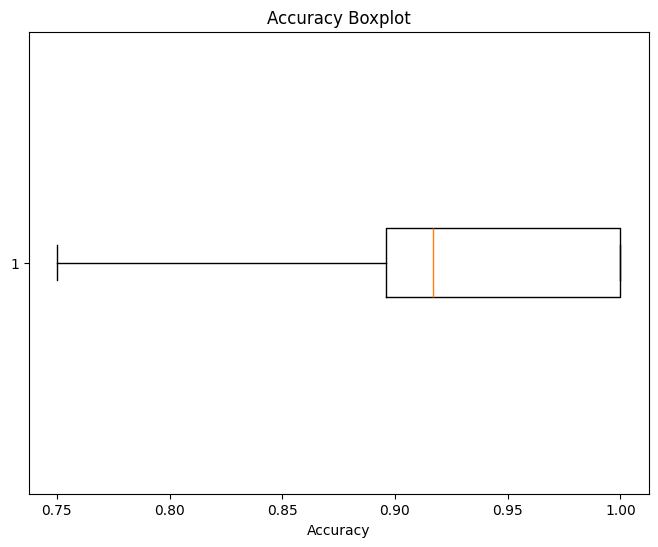

In [292]:
plt.figure(figsize=(8, 6))
plt.boxplot(model.history["val_accuracy"], vert=False)
plt.title("Accuracy Boxplot")
plt.xlabel("Accuracy")
plt.show()

## Dataframe 2


In [293]:
X, y = df_2.iloc[:, 1:].values, df_2.iloc[:, 0].values

In [294]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=.3, random_state=4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=.5, random_state=4, stratify=y_temp)

In [295]:
model = BaggingClassifier(base_classifier=LogisticRegression, n_estimators=100)
model.fit(X_train, y_train, X_val, y_val)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy:", val_accuracy)

# y_train_pred = model.predict(X_train)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training Accuracy:", train_accuracy)

# If the model is overfitting, the training accuracy will be much higher than the validation accuracy

# y_test_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)


# print("Accuracy: ", sum(model.history["accuracy"])/len(model.history["accuracy"]))
print("Validation Accuracy: ", np.mean(model.history["val_accuracy"]))
# print("Loss: ", sum(model.history["loss"])/len(model.history["loss"]))
# print("Validation Loss: ", sum(model.history["val_loss"])/len(model.history["val_loss"]))

print("R2 Score: ", r2_score(y_val, y_val_pred))
print("Mean Squared Error: ", mean_squared_error(y_val, y_val_pred))
# print("R2 Score: ", r2_score(y_train, y_train_pred))
# print("Mean Squared Error: ", mean_squared_error(y_train, y_train_pred))
# print("R2 Score: ", r2_score(y_val, y_val_pred))
# print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred))

C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744

Validation Accuracy:  0.8277777777777778
R2 Score:  0.5
Mean Squared Error:  0.1111111111111111


C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744

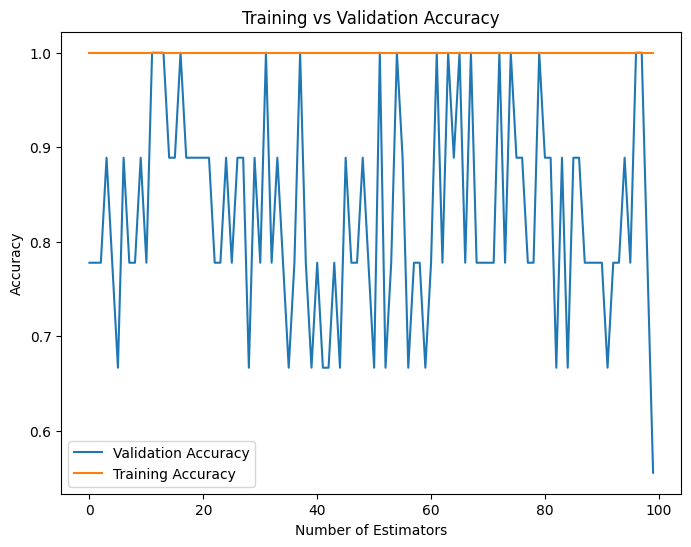

In [296]:
plt.figure(figsize=(8, 6))
plt.plot(model.history["val_accuracy"], label="Validation Accuracy")
plt.plot(model.history["accuracy"], label="Training Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

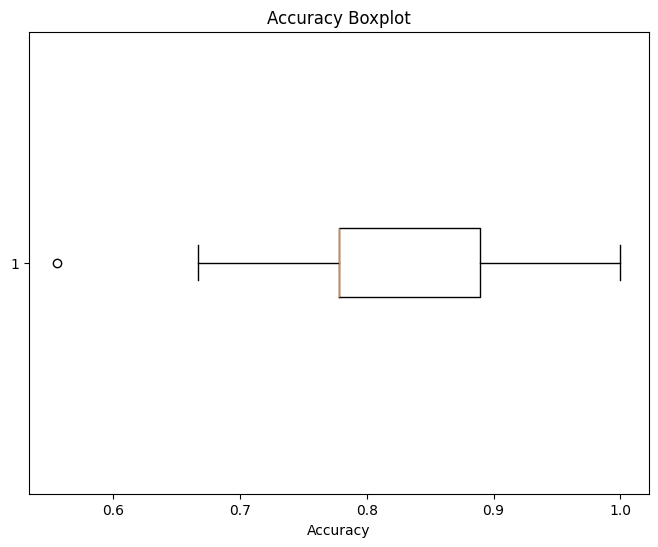

In [297]:
plt.figure(figsize=(8, 6))
plt.boxplot(model.history["val_accuracy"], vert=False)
plt.title("Accuracy Boxplot")
plt.xlabel("Accuracy")
plt.show()

### Dataframe 3

In [298]:
X, y = df_3.iloc[:, 1:].values, df_3.iloc[:, 0].values

In [299]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=.3, random_state=4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=.5, random_state=4, stratify=y_temp)

In [300]:
model = BaggingClassifier(base_classifier=LogisticRegression, n_estimators=100)
model.fit(X_train, y_train, X_val, y_val)

y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy:", val_accuracy)

# y_train_pred = model.predict(X_train)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training Accuracy:", train_accuracy)

# If the model is overfitting, the training accuracy will be much higher than the validation accuracy

# y_test_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)

# print("Accuracy: ", sum(model.history["accuracy"])/len(model.history["accuracy"]))
print("Validation Accuracy: ", np.mean(model.history["val_accuracy"]))
# print("Loss: ", sum(model.history["loss"])/len(model.history["loss"]))
# print("Validation Loss: ", sum(model.history["val_loss"])/len(model.history["val_loss"]))

# print("R2 Score: ", r2_score(y_train, y_train_pred))
# print("Mean Squared Error: ", mean_squared_error(y_train, y_train_pred))

print("R2 Score: ", r2_score(y_val, y_val_pred))
print("Mean Squared Error: ", mean_squared_error(y_val, y_val_pred))

# print("R2 Score: ", r2_score(y_test, y_test_pred))
# print("Mean Squared Error: ", mean_squared_error(y_test, y_test_pred))

C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: d

Validation Accuracy:  0.9283333333333335
R2 Score:  0.5555555555555556
Mean Squared Error:  0.08333333333333333


C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\tranl\AppData\Local\Temp\ipykernel_5744\2025513295.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


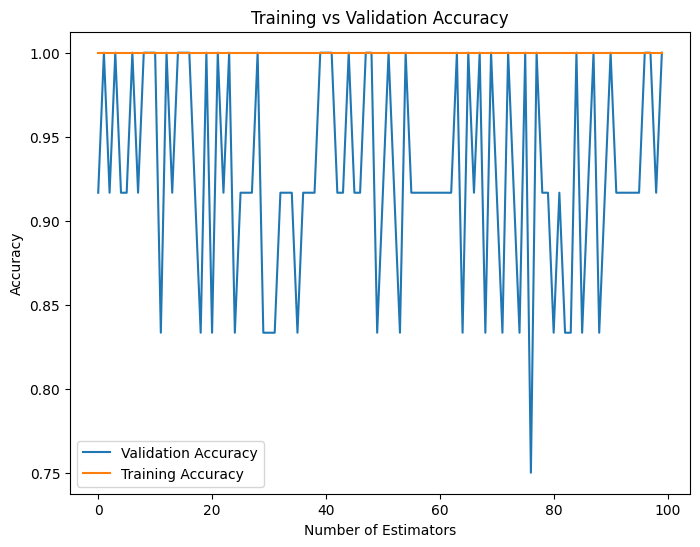

In [301]:
plt.figure(figsize=(8, 6))
plt.plot(model.history["val_accuracy"], label="Validation Accuracy")
plt.plot(model.history["accuracy"], label="Training Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

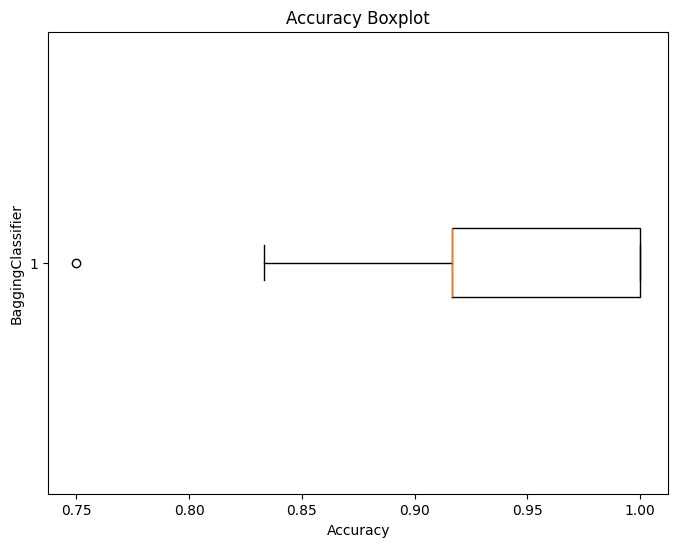

In [302]:
plt.figure(figsize=(8, 6))
plt.boxplot(model.history["val_accuracy"], vert=False)
plt.title("Accuracy Boxplot")
plt.xlabel("Accuracy")
plt.ylabel("BaggingClassifier")
plt.show()